# 統計の基礎


In [1]:
import pandas as pd
df = pd.DataFrame([
    ["いちごストア株式会社", "A4491", "上場", "小売業", 50, 250],
    ["メガハード株式会社", "A3547", "上場", "製造業", 50, 300],
    ["百聞半導体株式会社", "A2704", "上場", "製造業", 20, 180],
    ["五十音サーチ株式会社", "A8008", "上場", "小売業", 30, 200],
    ["利根川通販株式会社", "A4342", "上場", "小売業", 100, 240],
    ["超手本株式会社", "A3674", "上場", "サービス業", 20, 150],
    ["源内自動車株式会社", "A7514", None, "製造業", 10, 100],
    ["クローズサピエンス合同会社", "A0941", None, "サービス業", None, 120],
    ["富価自動車株式会社", "J7203", "上場", "製造業", 60, 120],
    ["ハード通信株式会社", "J9984", "上場", "サービス業", 15, 50],
    ["株式会社財前", "J3994", None, "サービス業", None, 30]
    ], columns=["会社名", "会社コード", "上場区分", "業種", "従業員数", "資本金"]
)

In [2]:
df

,会社名,会社コード,上場区分,業種,従業員数,資本金
0,いちごストア株式会社,A4491,上場,小売業,50.0,250
1,メガハード株式会社,A3547,上場,製造業,50.0,300
2,百聞半導体株式会社,A2704,上場,製造業,20.0,180
3,五十音サーチ株式会社,A8008,上場,小売業,30.0,200
4,利根川通販株式会社,A4342,上場,小売業,100.0,240
5,超手本株式会社,A3674,上場,サービス業,20.0,150
6,源内自動車株式会社,A7514,None,製造業,10.0,100
7,クローズサピエンス合同会社,A0941,None,サービス業,NaN,120
8,富価自動車株式会社,J7203,上場,製造業,60.0,120
9,ハード通信株式会社,J9984,上場,サービス業,15.0,50


## 変数の種類

### 量的変数と質的変数

### ディメンジョンとメジャー

## 度数分布とヒストグラム


In [3]:
s = df["資本金"]
freq_dist = (s
    .value_counts(bins=range(0, 501, 100), sort=False)
    .reset_index()
    .rename(columns={"index": "資本金階級", "資本金": "度数"})
)
freq_dist

,資本金階級,count
0,"(-0.001, 100.0]",3
1,"(100.0, 200.0]",5
2,"(200.0, 300.0]",3
3,"(300.0, 400.0]",0
4,"(400.0, 500.0]",0


<Axes: >

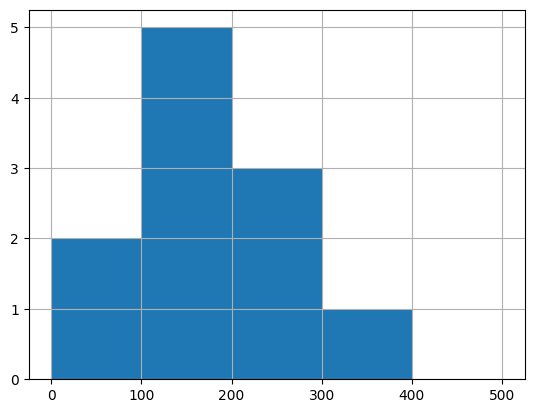

In [4]:

s.hist(bins=range(0, 501, 100))

## 要約統計量


In [5]:
# サンプルサイズ
df["従業員数"].size 

11

In [ ]:
# Nullを除く件数
df["従業員数"].count()

In [ ]:
# Nullと重複を除く件数（授業員は50人と20人の企業があり、重複しているので減る）
df["従業員数"].nunique()

In [ ]:
# 合計値
df["資本金"].sum()

In [ ]:
# 平均値
df["資本金"].mean()

In [ ]:
# 最大値、最小値
df["資本金"].max(), df["資本金"].min()

In [ ]:
# 中央値
df["資本金"].median()

In [ ]:
# 25%分位数
df["資本金"].quantile(0.25)

In [ ]:
# 最頻値
df["資本金"].mode()

In [ ]:
# 分散
df["資本金"].var()

In [ ]:
# 標準偏差
df["資本金"].std()

In [ ]:
# 基本統計量を確認できるdescribe()メソッド
df.describe()

## 量的変数と質的変数の変換

### 離散化


In [6]:
# cutは値の範囲を等しく分割する。最低30と最高300の差270を3等分する
# qcutはデータの個数が同じくらいになるように分割する。このデータの場合、重複地とデータ数の関係から同じようなビン数になっていない
df = df.assign(**{
    "資本金区分": pd.cut(df["資本金"], bins=3, right=False),
    "資本金区分等頻度離散化": pd.qcut(df["資本金"], q=3)
})
df[["資本金", "資本金区分", "資本金区分等頻度離散化"]]

,資本金,資本金区分,資本金区分等頻度離散化
0,250,"[210.0, 300.27)","(193.333, 300.0]"
1,300,"[210.0, 300.27)","(193.333, 300.0]"
2,180,"[120.0, 210.0)","(120.0, 193.333]"
3,200,"[120.0, 210.0)","(193.333, 300.0]"
4,240,"[210.0, 300.27)","(193.333, 300.0]"
5,150,"[120.0, 210.0)","(120.0, 193.333]"
6,100,"[30.0, 120.0)","(29.999, 120.0]"
7,120,"[120.0, 210.0)","(29.999, 120.0]"
8,120,"[120.0, 210.0)","(29.999, 120.0]"
9,50,"[30.0, 120.0)","(29.999, 120.0]"


### ダミー変数

In [7]:
pd.get_dummies(df["業種"], dtype=int)

,サービス業,小売業,製造業
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,0,1
9,1,0,0


In [8]:
# 新しく一番右に作った『小売業フラグ』という列について（[-1]）、最初の5行分だけを（:5）、表の形式で表示する
# ただし、この書き方では「今」しか使えないので、別の書き方を考えるべき
df.assign(**{"小売業フラグ": (df["業種"] == "小売業").astype(int)}).iloc[:5, [-1]]

,小売業フラグ
0,1
1,0
2,0
3,1
4,1


In [9]:
# せっかく列名を作ったのだから列名で呼ぶ場合
df.assign(**{"小売業フラグ": (df["業種"] == "小売業").astype(int)}).loc[:, ["小売業フラグ"]]

,小売業フラグ
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [ ]:
# もっと単純に
df.assign(**{"小売業フラグ": (df["業種"] == "小売業").astype(int)})[["小売業フラグ"]]

## クロス集計


In [10]:
# 1. 集計対象とする列（資本金区分と上場区分）を指定
cols = ["資本金区分", "上場区分"]

# 2. 指定した列の組み合わせでグループ化し、各グループの件数（度数）を数える
#    - dropna=False: 欠損値（NaN）も一つのカテゴリとして含めて集計する
#    - observed=False: データが1件も存在しない区分（空のビン）も結果に表示する
#    - size(): 各グループの行数をカウント
#    - reset_index: 集計結果をきれいな表（DataFrame）の形式に戻し、件数の列名を「度数」にする
df[cols].groupby(cols, dropna=False, observed=False).size().reset_index(name="度数")

,資本金区分,上場区分,度数
0,"[30.0, 120.0)",上場,1
1,"[30.0, 120.0)",NaN,2
2,"[120.0, 210.0)",上場,4
3,"[120.0, 210.0)",NaN,1
4,"[210.0, 300.27)",上場,3
5,"[210.0, 300.27)",NaN,0


In [11]:
# 1. 集計に使用する列と、計算したい列（従業員数）をまとめて選択
#    cols + ["従業員数"] は ["資本金区分", "上場区分", "従業員数"] になります
# 2. 指定した列（cols）の組み合わせでグループ化し、平均値（mean）を算出
#    - dropna=False / observed=False: 欠損値を含め、データ0件の区分も表示する設定
# 3. reset_index(): 集計結果をきれいな表の形式に戻す
df[cols + ["従業員数"]].groupby(cols, dropna=False, observed=False).mean().reset_index()

,資本金区分,上場区分,従業員数
0,"[30.0, 120.0)",上場,15.000000
1,"[30.0, 120.0)",NaN,10.000000
2,"[120.0, 210.0)",上場,32.500000
3,"[120.0, 210.0)",NaN,NaN
4,"[210.0, 300.27)",上場,66.666667
5,"[210.0, 300.27)",NaN,NaN


In [12]:
df[cols + ["従業員数"]].groupby(cols, dropna=False, observed=False).count().reset_index()

,資本金区分,上場区分,従業員数
0,"[30.0, 120.0)",上場,1
1,"[30.0, 120.0)",NaN,1
2,"[120.0, 210.0)",上場,4
3,"[120.0, 210.0)",NaN,0
4,"[210.0, 300.27)",上場,3
5,"[210.0, 300.27)",NaN,0


In [13]:
# 1. 欠損値を埋める（準備）
#    「上場区分」が空欄(NaN)だと集計から漏れるので、「非上場」という文字で埋めた新しい表(table)を作ります
table = df.fillna(value={"上場区分": "非上場"})

# 2. ピボットテーブルの作成（集計）
pd.pivot_table(table, 
    values="従業員数",      # 【中身】集計（計算）したい数字は何？ → 従業員数
    index="資本金区分",     # 【縦】行の見出しにしたいのは何？ → 資本金区分
    columns="上場区分",     # 【横】列の見出しにしたいのは何？ → 上場区分
    aggfunc="mean",        # 【計算方法】どう計算する？ → 平均値(mean)を出して
    observed=False         # 【その他】データ0件のカテゴリも省略せずに表に出す
)

上場区分,上場,非上場
資本金区分,,
"[30.0, 120.0)",15.000000,10.0
"[120.0, 210.0)",32.500000,NaN
"[210.0, 300.27)",66.666667,NaN


In [14]:
# クロス集計を行う別の書き方（crosstab）
pd.crosstab(
    index=table["資本金区分"],   # 【縦】に使用する「列のデータ」を渡す
    columns=table["上場区分"],   # 【横】に使用する「列のデータ」を渡す
    values=table["従業員数"],     # 【中身】計算対象の「列のデータ」を渡す
    aggfunc="mean"             # 【計算方法】平均値を算出
)

上場区分,上場,非上場
資本金区分,,
"[30.0, 120.0)",15.000000,10.0
"[120.0, 210.0)",32.500000,NaN
"[210.0, 300.27)",66.666667,NaN


### どっちを使えばいいの？

結論から言うと、基本は pd.pivot_table の方が書きやすくておすすめです。

しかし、crosstab にも以下のメリットがあります。

単純な「件数」を出すだけなら一番楽
値を指定（values や aggfunc）しない場合、勝手に「件数」をカウントしてくれます。これが crosstab （クロス集計）という名前の由来通りの最もシンプルな使い方です。
グループ単位の「割合（％）」を出しやすい
normalize=True というオプションを追加するだけで、「行の中での％」や「全体の中での％」を簡単に計算できます（pivot_table だと少し工夫が必要です）。
まとめ
pivot_table: Excel感覚で、大きな表から多角的に分析したいときに使う。
crosstab: 「この A列 と B列 の関係性だけパッと見たい」というときや、単純な件数・％表を作りたいときに使う。
今回のコードのように values や aggfunc を指定している場合は、単に「同じ結果になるけど、こういう書き方もあるよ」という紹介だと捉えてOKです！

## 2変量の統計


<Axes: xlabel='capital', ylabel='num of employees'>

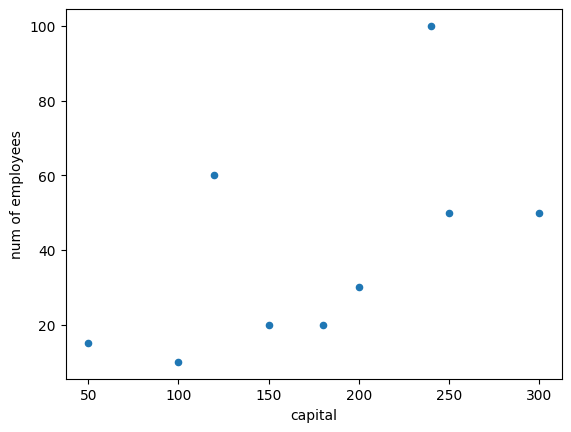

In [15]:
df_eng = df[["資本金", "従業員数"]].rename(columns={"資本金": "capital", "従業員数": "num of employees"})
df_eng.plot.scatter(x="capital", y="num of employees")

In [ ]:
# !pip install seaborn

<Axes: xlabel='num of employees', ylabel='capital'>

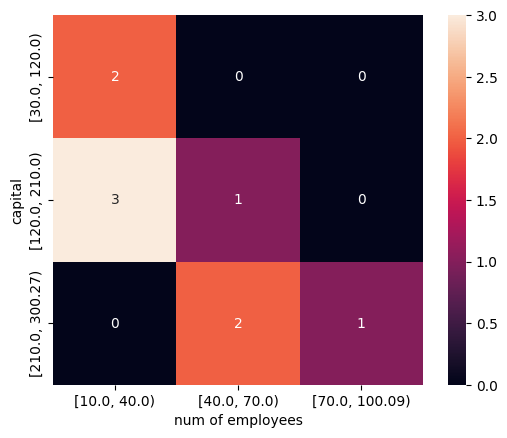

In [17]:
import seaborn as sns

# 1. 「従業員数」（数値）を値の範囲で3分割し、新しい列「従業員区分」を作成
# right=False は「境界値の左側を含み、右側を含まない」設定
df = df.assign(**{"従業員区分": pd.cut(df["従業員数"], bins=3, right=False)})

# 2. 集計に必要な2列だけを抽出し、グラフ表示用に列名を英語に変更
heat_df = (df[["資本金区分", "従業員区分"]]
    .rename(columns={"資本金区分": "capital", "従業員区分": "num of employees"})
)

# 3. クロス集計表（ピボットテーブル）を作成
# 縦軸に資本金、横軸に従業員区分を並べ、それぞれの「件数（size）」をカウント
# observed=False は、データが1件もない区分も省略せずに表示する設定
heat_crosstab = heat_df.pivot_table(
    index="capital", 
    columns="num of employees", 
    aggfunc="size", 
    observed=False
)

# 4. 集計結果をヒートマップで可視化
# square=True でマス目を正方形に、annot=True でマスの中に数値を表示
sns.heatmap(heat_crosstab, square=True, annot=True)

In [20]:
# 分散共分散行列の作成
df[["資本金", "従業員数"]].cov()

,資本金,従業員数
資本金,7196.363636,1291.666667
従業員数,1291.666667,827.777778


In [21]:
# 相関行列の作成
df[["資本金", "従業員数"]].corr()

,資本金,従業員数
資本金,1.000000,0.562281
従業員数,0.562281,1.000000


<Axes: >

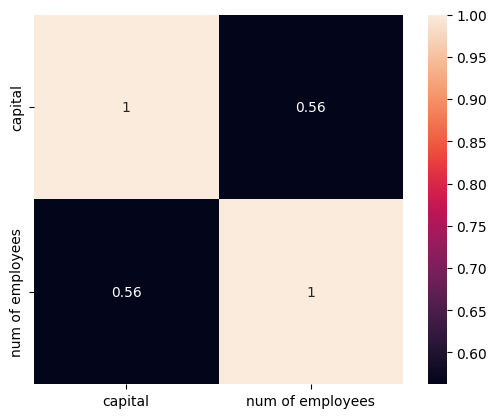

In [ ]:
# 相関行列のヒートマップ化
sns.heatmap(df_eng.corr(), square=True, annot=True)

## 統計の分類と経済統計

### 調査統計・業務統計・加工統計および基幹統計

### 全数調査と標本調査

### 実質値と名目値

### 季節調整
